Load Neccessary Packages

In [1]:
 #Allows us to Handle and Locate Files within the System Directory
import os 

#Allows us to work with CSV Files
import pandas as pd 
import numpy as np

#Helps us visualize the Data
import matplotlib.pyplot as plt
import seaborn as sns

Setting the directory of the downloaded play-by-play data downloaded from NFLverse

In [2]:
project_dir = r"C:\Users\georg\OneDrive\Desktop\pbp_data"

The pbp data between 2001 and 2023 loaded into a dataframe

In [3]:
years = list(range(2015, 2023))
dfs = []

for year in years:
    pbp_file = os.path.join(project_dir, f"pbp_data_{year}.csv")
    df = pd.read_csv(pbp_file)
    dfs.append(df)

df = pd.concat(dfs)

C:\Users\georg\AppData\Local\Temp\ipykernel_14536\34702796.py:6: DtypeWarning: Columns (46,180,181,183,184,190,191,194,195,198,199,204,205,206,207,219,220,221,234,235,236,237,238,239,249,250,254,255,256,261,263,264,284,285,302) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(pbp_file)
C:\Users\georg\AppData\Local\Temp\ipykernel_14536\34702796.py:6: DtypeWarning: Columns (180,181,183,184,190,191,194,195,198,199,204,205,206,207,210,211,219,220,221,249,250,254,255,256,261,263,264,284,285,302) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(pbp_file)
C:\Users\georg\AppData\Local\Temp\ipykernel_14536\34702796.py:6: DtypeWarning: Columns (180,181,183,184,190,191,192,193,194,195,198,199,200,201,204,205,206,207,214,215,219,220,221,249,250,254,255,256,261,263,264,267,268,269,270,284,285,302) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(pbp_file)
C:\Users\geor

In [4]:
df.columns.values

array(['Unnamed: 0', 'play_id', 'game_id', 'old_game_id', 'home_team',
       'away_team', 'season_type', 'week', 'posteam', 'posteam_type',
       'defteam', 'side_of_field', 'yardline_100', 'game_date',
       'quarter_seconds_remaining', 'half_seconds_remaining',
       'game_seconds_remaining', 'game_half', 'quarter_end', 'drive',
       'sp', 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo',
       'ydsnet', 'desc', 'play_type', 'yards_gained', 'shotgun',
       'no_huddle', 'qb_dropback', 'qb_kneel', 'qb_spike', 'qb_scramble',
       'pass_length', 'pass_location', 'air_yards', 'yards_after_catch',
       'run_location', 'run_gap', 'field_goal_result', 'kick_distance',
       'extra_point_result', 'two_point_conv_result',
       'home_timeouts_remaining', 'away_timeouts_remaining', 'timeout',
       'timeout_team', 'td_team', 'td_player_name', 'td_player_id',
       'posteam_timeouts_remaining', 'defteam_timeouts_remaining',
       'total_home_score', 'total_away_score', '

Checking which columns in the database can be converted to floats which is neccessary to test them against correlation

In [5]:
for column in df.columns:
    try:
        df[column].astype(float)
    except ValueError:
        print(f"Could not convert column '{column}' to float.")
        continue

Could not convert column 'game_id' to float.
Could not convert column 'home_team' to float.
Could not convert column 'away_team' to float.
Could not convert column 'season_type' to float.
Could not convert column 'posteam' to float.
Could not convert column 'posteam_type' to float.
Could not convert column 'defteam' to float.
Could not convert column 'side_of_field' to float.
Could not convert column 'game_date' to float.
Could not convert column 'game_half' to float.
Could not convert column 'time' to float.
Could not convert column 'yrdln' to float.
Could not convert column 'desc' to float.
Could not convert column 'play_type' to float.
Could not convert column 'pass_length' to float.
Could not convert column 'pass_location' to float.
Could not convert column 'run_location' to float.
Could not convert column 'run_gap' to float.
Could not convert column 'field_goal_result' to float.
Could not convert column 'extra_point_result' to float.
Could not convert column 'two_point_conv_result

Narrowing down the dataframe to only include passing plays

In [6]:
passing_df = df[df['play_type'] == 'pass']

Testing for correlation between touchdowns and all other columns in the dataframe (excluding the columns that cannot be converted into floats)

In [7]:

# Select the columns for correlation matrix
columns = [col for col in passing_df.columns if col not in ['play_id', 'game_id', 'old_game_id', 'home_team', 'away_team', 'season_type', 'week', 'posteam', 'posteam_type', 'defteam', 'side_of_field', 'game_date', 'game_half', 'time', 'yrdln', 'desc', 'play_type', 'pass_length', 'pass_location', 'run_location', 'run_gap', 'field_goal_result', 'extra_point_result', 'two_point_conv_result', 'timeout_team', 'td_team', 'td_player_name', 'td_player_id', 'passer_player_id', 'passer_player_name', 'receiver_player_id', 'receiver_player_name', 'rusher_player_id', 'rusher_player_name', 'lateral_receiver_player_id', 'lateral_receiver_player_name', 'lateral_rusher_player_id', 'lateral_rusher_player_name', 'interception_player_id', 'interception_player_name', 'lateral_interception_player_id', 'lateral_interception_player_name', 'punt_returner_player_id', 'punt_returner_player_name', 'lateral_punt_returner_player_id', 'lateral_punt_returner_player_name', 'kickoff_returner_player_name', 'kickoff_returner_player_id', 'lateral_kickoff_returner_player_id', 'lateral_kickoff_returner_player_name', 'punter_player_id', 'punter_player_name', 'kicker_player_name', 'kicker_player_id', 'own_kickoff_recovery_player_id', 'own_kickoff_recovery_player_name', 'blocked_player_id', 'blocked_player_name', 'tackle_for_loss_1_player_id', 'tackle_for_loss_1_player_name', 'tackle_for_loss_2_player_id', 'tackle_for_loss_2_player_name', 'qb_hit_1_player_id', 'qb_hit_1_player_name', 'qb_hit_2_player_id', 'qb_hit_2_player_name', 'forced_fumble_player_1_team', 'forced_fumble_player_1_player_id', 'forced_fumble_player_1_player_name', 'forced_fumble_player_2_team', 'forced_fumble_player_2_player_id', 'forced_fumble_player_2_player_name', 'solo_tackle_1_team', 'solo_tackle_2_team', 'solo_tackle_1_player_id', 'solo_tackle_2_player_id', 'solo_tackle_1_player_name', 'solo_tackle_2_player_name', 'assist_tackle_1_player_id', 'assist_tackle_1_player_name', 'assist_tackle_1_team', 'assist_tackle_2_player_id', 'assist_tackle_2_player_name', 'assist_tackle_2_team', 'assist_tackle_3_player_id', 'assist_tackle_3_player_name', 'assist_tackle_3_team', 'assist_tackle_4_player_id', 'assist_tackle_4_player_name', 'assist_tackle_4_team', 'tackle_with_assist_1_player_id', 'tackle_with_assist_1_player_name', 'tackle_with_assist_1_team', 'tackle_with_assist_2_player_id', 'tackle_with_assist_2_player_name', 'tackle_with_assist_2_team', 'pass_defense_1_player_id', 'pass_defense_1_player_name', 'pass_defense_2_player_id', 'pass_defense_2_player_name', 'fumbled_1_team', 'fumbled_1_player_id', 'fumbled_1_player_name', 'fumbled_2_player_id', 'fumbled_2_player_name', 'fumbled_2_team', 'fumble_recovery_1_team', 'fumble_recovery_1_player_id', 'fumble_recovery_1_player_name', 'fumble_recovery_2_team', 'fumble_recovery_2_player_id', 'fumble_recovery_2_player_name', 'sack_player_id', 'sack_player_name', 'half_sack_1_player_id', 'half_sack_1_player_name', 'half_sack_2_player_id', 'half_sack_2_player_name', 'return_team', 'penalty_team', 'penalty_player_id', 'penalty_player_name', 'replay_or_challenge_result', 'penalty_type', 'safety_player_name', 'safety_player_id', 'series_result', 'start_time', 'time_of_day', 'stadium', 'weather', 'nfl_api_id', 'play_type_nfl', 'st_play_type', 'end_clock_time', 'end_yard_line', 'fixed_drive_result', 'drive_real_start_time', 'drive_time_of_possession', 'drive_start_transition', 'drive_end_transition', 'drive_game_clock_start', 'drive_game_clock_end', 'drive_start_yard_line', 'drive_end_yard_line', 'location', 'roof', 'surface', 'home_coach', 'away_coach', 'stadium_id', 'game_stadium', 'passer', 'rusher', 'receiver', 'passer_id', 'rusher_id', 'receiver_id', 'name', 'id', 'fantasy_player_name', 'fantasy_player_id', 'fantasy', 'fantasy_id']]

# Calculate the correlation matrix
corr_matrix = passing_df[columns].corr()

# Select the columns with significant correlation with passing touchdowns
pass_td_corr = corr_matrix['touchdown']
significant_columns = pass_td_corr[pass_td_corr.abs() > 0.25].index.tolist()

# Print the columns with significant correlation with passing touchdowns
print("Columns with significant correlation with passing touchdowns:")
for column in significant_columns:
    print(column)



Columns with significant correlation with passing touchdowns:
yardline_100
sp
goal_to_go
ep
epa
comp_air_epa
first_down_pass
touchdown
pass_touchdown
fumble_recovery_1_yards
fumble_recovery_2_yards
first_down
qb_epa


This code snippet focuses on preparing and analyzing quarterback-specific features from an NFL dataset to predict touchdowns during passing plays

In [8]:
qb_feats = ['season','passer_id','passer','touchdown','yardline_100', 'sp', 'goal_to_go', 'ep', 'epa', 'comp_air_epa', 'first_down_pass','fumble_recovery_1_yards', 'first_down', 'qb_epa']

groupby_feats = ['season','passer_id','passer']

#To analyze data at the quarterback level across multiple seasons, the dataset is grouped by `season`, `passer_id`, and `passer`. This allows us to sum up all the numerical features for each quarterback per season, giving insights into their cumulative performance across different games and seasons. 
qb_df = (df
         .loc[:, qb_feats]
         .groupby(groupby_feats, 
                  as_index=False)
         .sum())

qb_df.sample(10)

,season,passer_id,passer,touchdown,yardline_100,sp,goal_to_go,ep,epa,comp_air_epa,first_down_pass,fumble_recovery_1_yards,first_down,qb_epa
477,2019,00-0033908,C.Kupp,0.0,19.0,0,0,3.820429,-1.315012,0.000000,0.0,0.0,0.0,-1.315012
386,2018,00-0034253,D.Hilliard,0.0,34.0,0,0,3.450114,-6.418368,0.000000,0.0,0.0,0.0,-6.418368
105,2016,00-0023645,D.Anderson,3.0,2958.0,4,7,129.557617,-5.074024,12.096500,22.0,0.0,23.0,-5.074024
141,2016,00-0029567,N.Foles,3.0,2658.0,3,4,161.323373,-5.390007,-3.540034,15.0,0.0,17.0,-5.390007
52,2015,00-0028090,T.Yates,3.0,4233.0,3,2,95.383701,-1.277636,18.202676,19.0,0.0,22.0,-1.277636
817,2022,00-0034855,B.Mayfield,12.0,21967.0,12,8,739.881300,-47.486797,10.777306,94.0,-1.0,111.0,-40.949246
588,2020,00-0034418,C.Wilson,1.0,94.0,1,0,3.283500,2.822940,-0.224123,1.0,0.0,1.0,2.822940
673,2021,00-0031941,J.Crowder,0.0,80.0,1,0,7.108225,0.829762,0.000000,0.0,0.0,1.0,0.829762
55,2015,00-0028595,S.Tolzien,0.0,186.0,0,0,-2.829192,-1.929903,-0.205375,0.0,0.0,0.0,-1.929903
144,2016,00-0029665,R.Griffin III,3.0,10864.0,3,13,306.740588,-8.166207,-2.464854,43.0,0.0,57.0,-8.166207


Plotting Touchdowns against other columns to re-check correlations

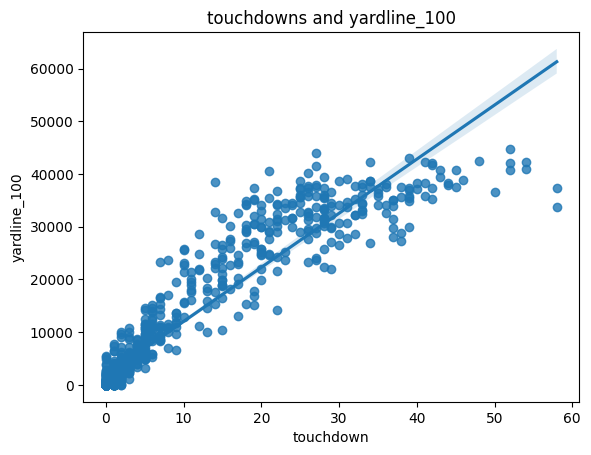

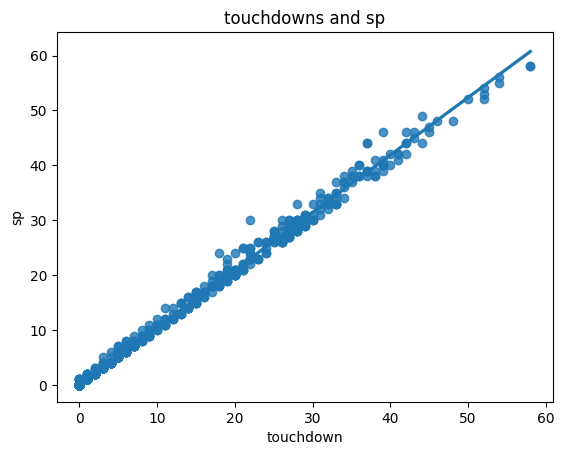

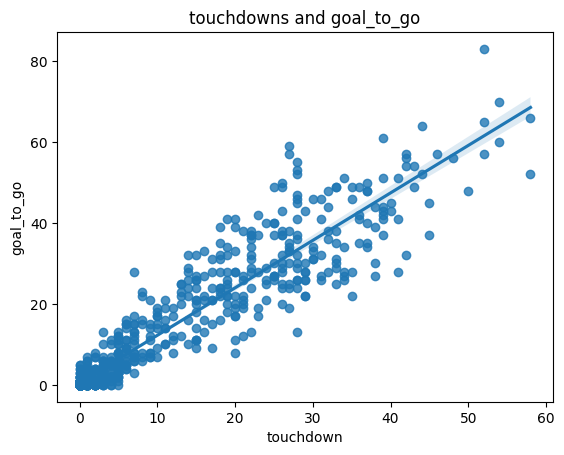

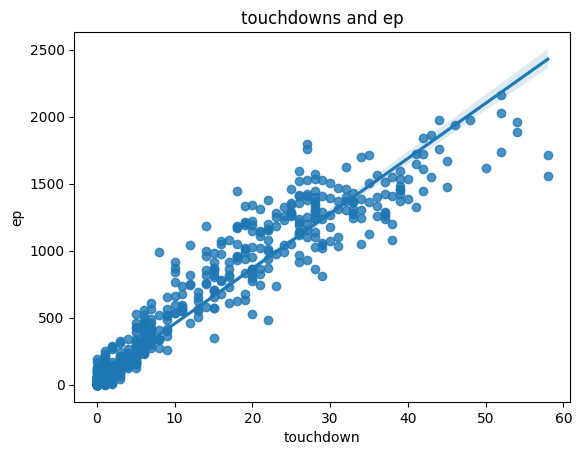

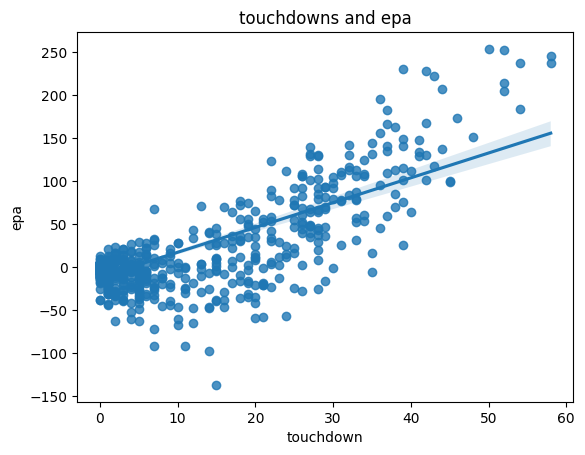

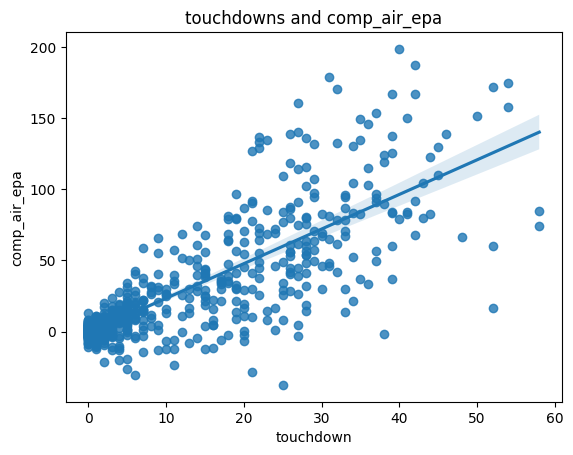

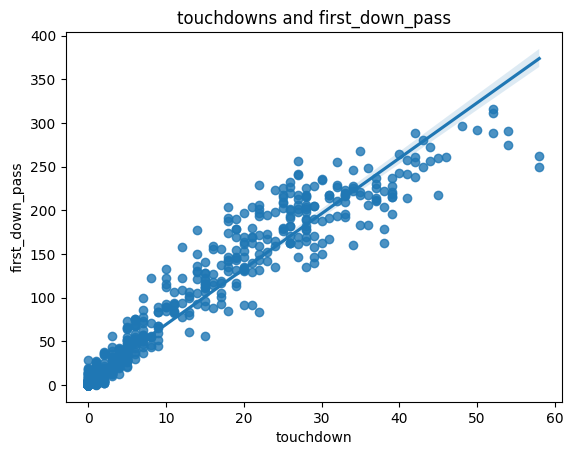

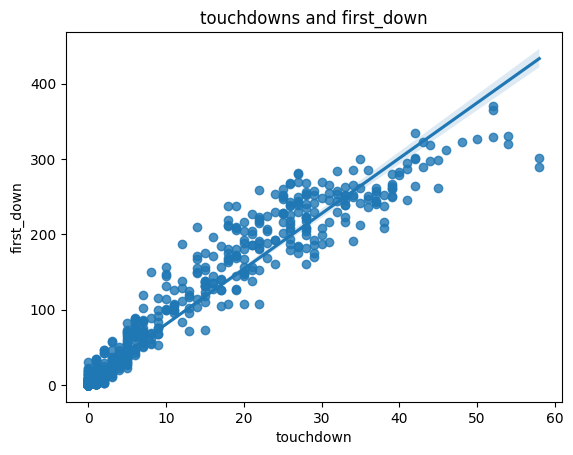

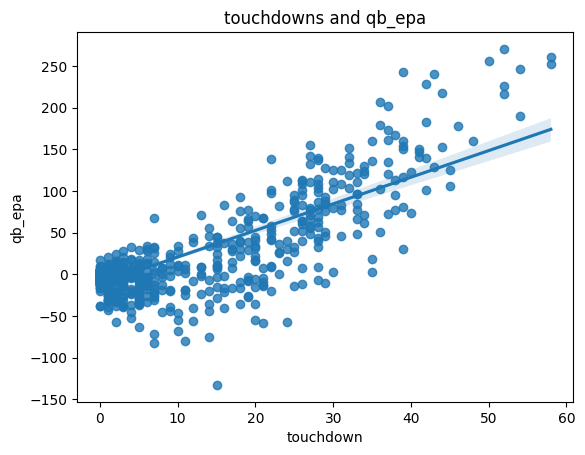

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

for y in ['yardline_100', 'sp', 'goal_to_go', 'ep', 'epa', 'comp_air_epa', 'first_down_pass','first_down', 'qb_epa']:
  sns.regplot(data=qb_df, x='touchdown', y=y)
  plt.title(f"touchdowns and {y}")
  plt.show()

Making a copy of the database and adding on the next seasons stats 

In [10]:

# make a copy of the qb dataframe 
_df = qb_df.copy()

# add 1 to season
_df['season'] = _df['season'].add(1)


new_qb_df = (qb_df
             .merge(_df, 
                    on=['season', 'passer_id', 'passer'], 
                    suffixes=('', '_prev'), 
                    how='left'))

new_qb_df.sample(10)

,season,passer_id,passer,touchdown,yardline_100,sp,goal_to_go,ep,epa,comp_air_epa,...,yardline_100_prev,sp_prev,goal_to_go_prev,ep_prev,epa_prev,comp_air_epa_prev,first_down_pass_prev,fumble_recovery_1_yards_prev,first_down_prev,qb_epa_prev
669,2021,00-0031503,J.Winston,15.0,10465.0,15,11,346.926987,38.183461,25.029611,...,645.0,1.0,6.0,50.305779,5.669424,-1.816658,6.0,0.0,7.0,5.669424
193,2017,00-0021429,C.Palmer,11.0,16080.0,11,19,593.237785,-12.365752,57.056699,...,36084.0,29.0,36.0,1331.227847,43.128525,116.067330,218.0,51.0,252.0,56.344906
599,2020,00-0034955,B.Rypien,3.0,2322.0,3,0,95.053513,6.791460,11.636216,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,2020,00-0035704,D.Lock,19.0,26727.0,20,18,938.574055,-19.017030,41.260944,...,9428.0,7.0,10.0,360.037199,25.310809,8.005347,54.0,2.0,71.0,25.310809
692,2021,00-0033681,K.Cole,0.0,9.0,0,0,4.689240,-0.740859,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,2017,00-0027994,S.Vereen,0.0,18.0,0,0,4.832523,-4.046503,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
417,2019,00-0027150,J.Edelman,1.0,67.0,1,0,6.293396,5.536067,2.334863,...,82.0,0.0,0.0,4.441425,3.175205,-2.723857,1.0,0.0,1.0,3.175205
315,2018,00-0027793,A.Brown,0.0,30.0,0,0,3.837159,-0.457092,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,2015,00-0030524,L.Jones,3.0,3598.0,3,2,112.473882,-7.015781,13.900570,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
640,2021,00-0026625,B.Hoyer,1.0,637.0,1,0,16.232512,20.877134,4.823108,...,1459.0,0.0,0.0,41.780160,-7.545304,2.909780,8.0,0.0,9.0,-7.545304


Graphing the touchdowns to the next seasons stats to check for correlation

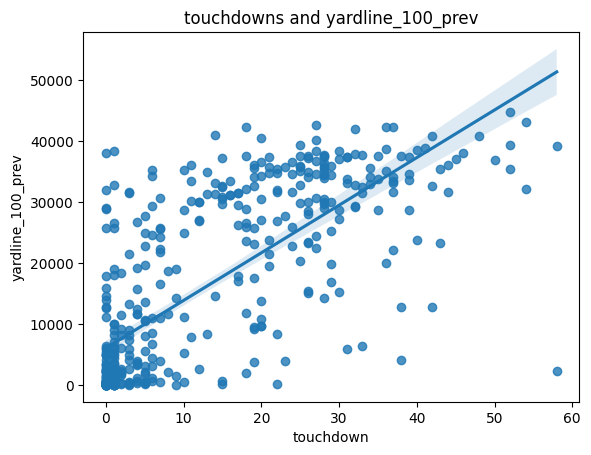

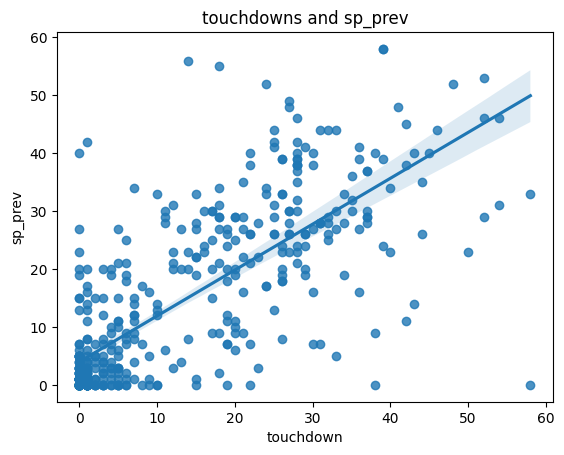

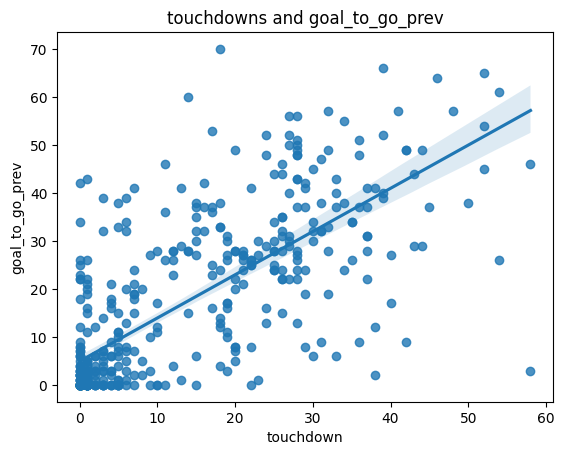

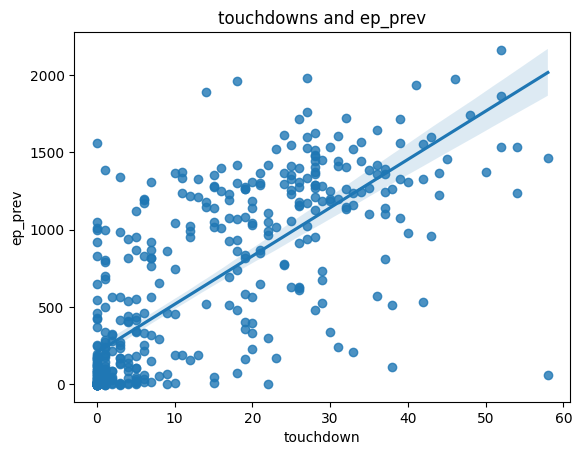

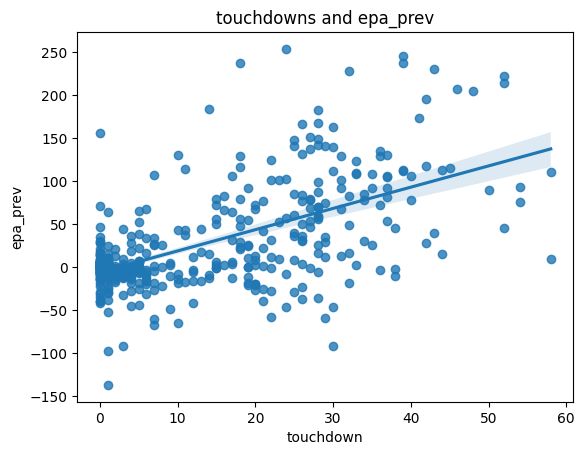

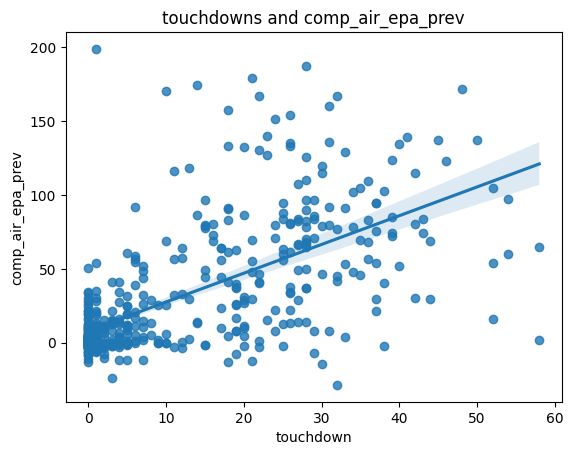

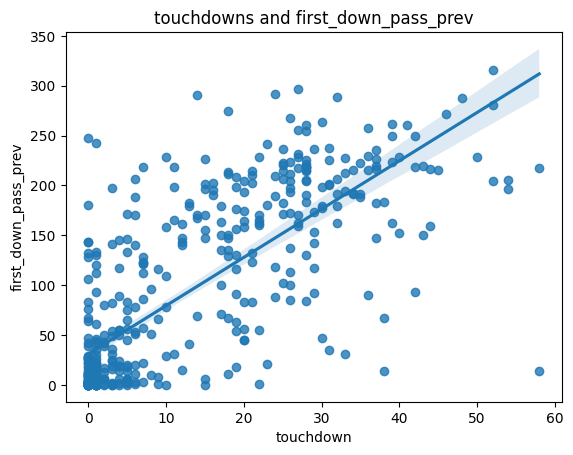

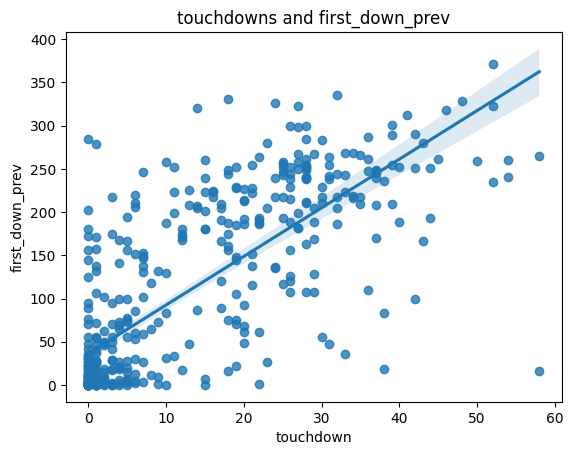

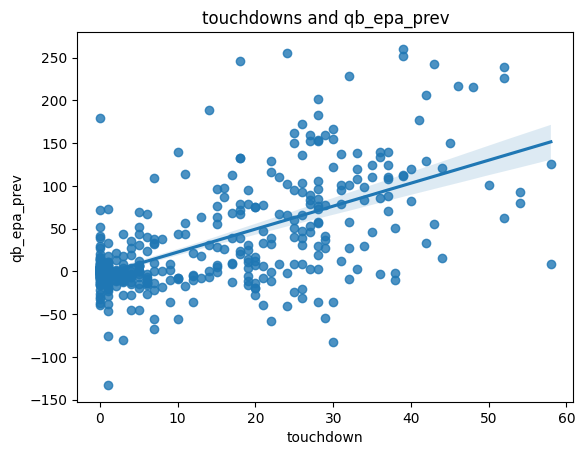

In [11]:
for y in ['yardline_100_prev', 'sp_prev', 'goal_to_go_prev', 'ep_prev', 'epa_prev', 'comp_air_epa_prev', 'first_down_pass_prev', 'first_down_prev', 'qb_epa_prev']:
  sns.regplot(data=new_qb_df, x='touchdown', y=y)
  plt.title(f"touchdowns and {y}")
  plt.show()

Importing packages relevant to the machine learning portion of the model

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import tensorflow as tf

In [13]:
new_qb_df.sample(10)

,season,passer_id,passer,touchdown,yardline_100,sp,goal_to_go,ep,epa,comp_air_epa,...,yardline_100_prev,sp_prev,goal_to_go_prev,ep_prev,epa_prev,comp_air_epa_prev,first_down_pass_prev,fumble_recovery_1_yards_prev,first_down_prev,qb_epa_prev
648,2021,00-0029000,C.Beasley,0.0,19.0,0,0,4.743834,-0.477591,0.000000,...,20.0,1.0,0.0,4.086229,2.913771,2.913771,1.0,0.0,1.0,2.913771
317,2018,00-0027939,C.Newton,25.0,28918.0,27,26,1051.361276,46.557822,34.339537,...,32825.0,26.0,24.0,1232.597297,39.688289,56.009614,182.0,0.0,218.0,39.688289
565,2020,00-0032943,R.Dixon,0.0,35.0,0,0,5.234777,-3.098855,0.000000,...,15.0,0.0,0.0,0.947000,-0.947000,0.000000,0.0,0.0,0.0,-0.947000
765,2022,00-0027973,A.Dalton,20.0,22056.0,21,17,861.229123,10.412462,45.213120,...,13734.0,11.0,7.0,565.013137,-19.622547,4.906452,83.0,0.0,92.0,-19.622547
410,2019,00-0025825,B.Kern,0.0,158.0,0,0,-0.492424,5.438432,0.039013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
458,2019,00-0032268,M.Mariota,7.0,11452.0,7,6,328.103244,1.601433,15.108903,...,22225.0,14.0,24.0,816.598559,25.600235,32.315337,121.0,0.0,149.0,33.538304
797,2022,00-0033357,T.Hill,2.0,891.0,2,0,74.351782,16.321355,7.686635,...,8261.0,5.0,2.0,319.425559,-5.045665,9.202752,43.0,0.0,50.0,-5.045665
337,2018,00-0030520,M.Glennon,1.0,823.0,1,3,60.332966,8.741518,8.649983,...,8168.0,5.0,5.0,290.274928,-29.131533,13.409387,42.0,0.0,46.0,-29.131533
622,2020,00-0036355,J.Herbert,33.0,36017.0,35,49,1365.395083,112.557082,29.779842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300,2018,00-0023682,R.Fitzpatrick,19.0,15114.0,20,22,631.714557,50.097857,80.007087,...,9255.0,7.0,17.0,403.733012,9.967168,37.625940,63.0,0.0,75.0,14.283126


Creating a neural network using tensorflow to predict touchdowns using the chosen data points

In [14]:
# Define the features and target variable
features = ['yardline_100', 'sp', 'goal_to_go', 'ep', 'epa', 'comp_air_epa', 'first_down_pass','qb_epa']
target = 'touchdown'


model_data = (new_qb_df
              .dropna(subset=features+[target]))


train_data = model_data[(model_data['season'] >= 2018) & (model_data['season'] <= 2021)]


test_data = (model_data
              .loc[model_data['season']==2022])             


# Split the data into X (features) and y (target)
X_train = train_data[features]
y_train = train_data[target]
X_test = test_data[features]
y_test = test_data[target]

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Create the neural network model using TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled).flatten()

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate the Pearson correlation coefficient
corr, _ = pearsonr(y_test, y_pred)
print(f'Pearson correlation coefficient: {corr}')


c:\Users\georg\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 222.3375   
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 167.9025 
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 74.5357 
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11.5053 
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 9.7373  
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.8821 
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.4778 
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.5749 
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4.3508 
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.4817 
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.2099 
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.7074 
Epoch 13/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.6333 
Epoch 14/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.7095 
Epoch 15/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.5

Plotting the predicted touchdowns produced by the neural network against actual touchdowns

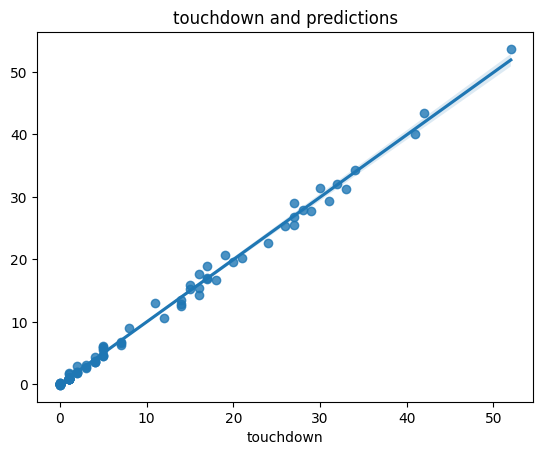

In [15]:
sns.regplot(data=test_data, x='touchdown', y=y_pred)
plt.title('touchdown and predictions')
plt.show()

Showing the touchdowns against actual touchdowns for players in a table format and sorted by number of touchdowns in descending order

In [16]:
test_data['predicted_touchdowns'] = y_pred

# Include the necessary columns and create a DataFrame to compare actual vs. predicted
result = test_data.loc[:, ['season', 'passer_id', 'passer', 'touchdown', 'predicted_touchdowns']]
result = result.sort_values('touchdown', ascending=False).head(10)

# Show the DataFrame
print(result)

     season   passer_id      passer  touchdown  predicted_touchdowns
804    2022  00-0033873   P.Mahomes       52.0             53.678677
846    2022  00-0036442    J.Burrow       42.0             43.471954
818    2022  00-0034857     J.Allen       41.0             40.085079
770    2022  00-0029604   K.Cousins       34.0             34.383369
773    2022  00-0030565     G.Smith       33.0             31.272041
792    2022  00-0033106      J.Goff       32.0             32.049824
791    2022  00-0033077  D.Prescott       31.0             29.423656
853    2022  00-0036971  T.Lawrence       30.0             31.426140
844    2022  00-0036389     J.Hurts       29.0             27.734375
755    2022  00-0023459   A.Rodgers       28.0             27.882235


C:\Users\georg\AppData\Local\Temp\ipykernel_14536\2634796164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted_touchdowns'] = y_pred


Now, we model the data using the sklearn package to showcase more traditional machine learning techniques

In [17]:
# Let's make a subset of data that has no null values
model_data = (new_qb_df
              .dropna(subset=features+[target]))

subset_df = model_data[(model_data['season'] >= 2018) & (model_data['season'] <= 2023)]

# Instead of training only on one year of data, let's use train_test_split for a more flexible and random subset
train_data, test_data = train_test_split(
    subset_df, 
    test_size=0.25,  # 20% of the data goes into the test set
    random_state=42,  # Set a random state for reproducibility
    stratify=subset_df['season']  # Optional: stratify by 'season' to maintain similar distribution in splits
)

# Initialize the linear regression
model = LinearRegression()

# Fit, or "train", the model on the training data
model.fit(train_data.loc[:, features], 
          train_data[target])

# Predict on the test data 
preds = model.predict(test_data.loc[:, features])

# Setting an index so your predictions match the correct rows
preds = pd.Series(preds, index=test_data.index)

# Join your predictions back to your test dataset
test_data['preds'] = preds

y_actual = test_data[target]



In [18]:
# Calculate Pearson's coefficient
pearson_coefficient, _ = pearsonr(preds, y_actual)
print("Pearson's coefficient:", pearson_coefficient)

# Calculate Mean Squared Error
mse = mean_squared_error(y_actual, preds)
print("Mean Squared Error:", mse)

Pearson's coefficient: 0.998152738410647
Mean Squared Error: 0.6085606235447789


Display the actual touchdowns against the touchdowns predicted by the model in a table format

In [19]:
test_data.loc[:, ['season', 'passer_id', 'passer', 'touchdown', 'preds']].sort_values('touchdown', ascending=False).head(10)

,season,passer_id,passer,touchdown,preds
804,2022,00-0033873,P.Mahomes,52.0,51.966834
712,2021,00-0034857,J.Allen,46.0,47.025545
740,2021,00-0036355,J.Herbert,44.0,47.150625
580,2020,00-0033873,P.Mahomes,43.0,44.742316
742,2021,00-0036442,J.Burrow,43.0,42.267718
846,2022,00-0036442,J.Burrow,42.0,44.064786
631,2021,00-0023459,A.Rodgers,39.0,37.553137
289,2018,00-0020531,D.Brees,37.0,37.988335
576,2020,00-0033537,D.Watson,35.0,37.052515
651,2021,00-0029604,K.Cousins,33.0,31.072517
